# PAR 2020-2021 Data Wrangling

Data Wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time

**Index**

- [Environment](#Environment)


- [Data Wrangling](#DataWrangling)
    - [Explore Data](#ExploreData)
    - [Clean Data](#CleanData)
    - [Remove Useless Columns](#RemoveColumns)
    - [Add New Columns](#AddColumns)


- [Clean CSV](#CleanCSV)


- [Insigths](#Insights)

## Environment

#### import libraries

In [1]:
# Pandas and Numpy
import pandas as pd
import numpy as np

#Time 
import time
from datetime import datetime
import datetime as dt

# Maths
import math
from scipy import stats

#Transform
from sklearn.preprocessing import OneHotEncoder

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### import data

In [2]:
apps = pd.read_csv("apps_allYears_semiClean.csv",parse_dates=["Bootcamp Start Date","Created Date","Close Date"],low_memory=False) 

To go on we select only **Bootcamp Year=2020&2021** and **Campus - Timezone=MAD1**

In [3]:
apps["Bootcamp Year"].value_counts()

2020    11060
2019     7225
2018     4607
2021     2676
2017     2147
2016     1008
Name: Bootcamp Year, dtype: int64

In [4]:
apps["Campus - Timezone"].value_counts()

MAD            4632
PAR            4343
BCN            3876
MIA            3483
MEX            3044
SAO            2606
BER            2186
RMT-Europe     1656
AMS            1326
LIS            1129
RMT-America     442
Name: Campus - Timezone, dtype: int64

In [5]:
apps_PAR20201=apps[(apps["Campus - Timezone"]=="PAR") & (apps["Bootcamp Year"]==2020)]

In [6]:
apps_PAR20201.shape

(1431, 58)

In [7]:
apps_PAR20201=apps[((apps["Campus - Timezone"]=="PAR") & (apps["Bootcamp Year"]==2020)) | ((apps["Campus - Timezone"]=="BCN")& (apps["Bootcamp Year"]==2021))]


In [8]:
apps_PAR20201.shape

(1645, 58)

In [9]:
# Explore data BCN20201 

In [10]:
apps_PAR20201.isnull().sum()

Opportunity ID                                 0
Opportunity Name                               0
Has Courses                                    0
Bootcamp Course                                0
Bootcamp Format                                0
Bootcamp Year                                  0
Bootcamp Start Date                            0
Campus                                         0
Campus - Timezone                              0
Created Date                                   0
Close Date                                     0
Invoice Date                                1471
Stage                                          0
Discount Amount (converted) Currency        1357
Discount Amount (converted)                    0
Scholarship Amount (converted) Currency     1638
Scholarship Amount (converted)                 0
Amount (converted) Currency                    0
Amount (converted)                             0
Net Amount With VAT (converted) Currency       0
Net Amount With VAT 

In [11]:
total_values_xCol= apps_PAR20201.count()+apps_PAR20201.isnull().sum()
total_values= total_values_xCol.sum()
total_ExValues=apps_PAR20201.count().sum()
total_NanValues=apps_PAR20201.isnull().sum().sum()

print(round(total_NanValues/total_values*100,2),"% of our data is null")
print("*Taking into account all IH organic apps (40228) and the 58 columns from IH that refers to the user and its moves during the Admissions Process")


37.01 % of our data is null
*Taking into account all IH organic apps (40228) and the 58 columns from IH that refers to the user and its moves during the Admissions Process


In [12]:
# check nuls

In [13]:
apps_PAR20201.isnull().sum().nlargest(20)

Last Email Date                            1645
Person Account: Company Located in         1645
Person Account: Linkedin URL               1645
Programming languages                      1645
Scholarship Amount (converted) Currency    1638
Needs Financing                            1591
Age                                        1587
Last Call Date                             1517
Invoice Date                               1471
Last Event Date                            1378
Discount Amount (converted) Currency       1357
Person Account: Type of Position           1347
Person Account: City Before Course         1290
Person Account: Highest degree received    1280
Person Account: Eligible to Work In        1260
Person Account: Looking for a Job          1255
Person Account: Nationality                1205
Person Account: Tech Background            1176
Last Task Date                             1158
Inactive Days                              1151
dtype: int64

In [14]:
column_with_nan = apps_PAR20201.columns[apps_PAR20201.isnull().any()]

In [15]:
df_shape=apps_PAR20201.shape

In [16]:
for column in column_with_nan:
    if apps_PAR20201[column].isnull().sum()*100.0/df_shape[0] > 60:
        apps_PAR20201.drop(column,1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
apps_PAR20201.isnull().sum()

Opportunity ID                                0
Opportunity Name                              0
Has Courses                                   0
Bootcamp Course                               0
Bootcamp Format                               0
Bootcamp Year                                 0
Bootcamp Start Date                           0
Campus                                        0
Campus - Timezone                             0
Created Date                                  0
Close Date                                    0
Stage                                         0
Discount Amount (converted)                   0
Scholarship Amount (converted)                0
Amount (converted) Currency                   0
Amount (converted)                            0
Net Amount With VAT (converted) Currency      0
Net Amount With VAT (converted)               0
Drop                                          0
Drop Reason                                   0
Lost Deal Reason                        

In [18]:
index_with_nan = apps_PAR20201.index[apps_PAR20201.isnull().any(axis=1)]
index_with_nan.shape

(976,)

In [19]:
apps_PAR20201.drop(index_with_nan,0, inplace=True)

In [20]:
apps_PAR20201.shape

(669, 37)

In [21]:
apps_PAR20201.isnull().sum()

Opportunity ID                              0
Opportunity Name                            0
Has Courses                                 0
Bootcamp Course                             0
Bootcamp Format                             0
Bootcamp Year                               0
Bootcamp Start Date                         0
Campus                                      0
Campus - Timezone                           0
Created Date                                0
Close Date                                  0
Stage                                       0
Discount Amount (converted)                 0
Scholarship Amount (converted)              0
Amount (converted) Currency                 0
Amount (converted)                          0
Net Amount With VAT (converted) Currency    0
Net Amount With VAT (converted)             0
Drop                                        0
Drop Reason                                 0
Lost Deal Reason                            0
Stage Before Lost                 

# CleanData

Now will continue to clean the columns we'll use.

**Column: Account: Last Activity**

In [22]:
apps_PAR20201['Account: Last Activity']

61       17/07/2020
104      17/02/2020
145      13/03/2020
172       5/03/2020
239      26/02/2020
            ...    
28637    27/07/2020
28661    28/08/2020
28679     7/08/2020
28707    21/07/2020
28708    24/07/2020
Name: Account: Last Activity, Length: 669, dtype: object

In [23]:
apps_PAR20201["Account: Last Activity"]= pd.to_datetime(apps_PAR20201["Account: Last Activity"])

<ipython-input-23-a0983abbf09a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_PAR20201["Account: Last Activity"]= pd.to_datetime(apps_PAR20201["Account: Last Activity"])


**Column: First touchpoint Date**

In [24]:
apps_PAR20201['First touchpoint Date']

61       17/07/2020 14:15
104      12/02/2020 11:06
145      12/03/2020 13:42
172       7/02/2020 15:35
239      12/02/2020 18:12
               ...       
28637    17/07/2020 16:17
28661    24/08/2020 10:26
28679    21/07/2020 16:04
28707    21/07/2020 15:39
28708    20/07/2020 12:51
Name: First touchpoint Date, Length: 669, dtype: object

In [25]:
apps_PAR20201['First touchpoint Date']=apps_PAR20201['First touchpoint Date'].apply(lambda x: x[:10])

<ipython-input-25-81b228484ec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_PAR20201['First touchpoint Date']=apps_PAR20201['First touchpoint Date'].apply(lambda x: x[:10])


In [26]:
apps_PAR20201['First touchpoint Date']= pd.to_datetime(apps_PAR20201['First touchpoint Date'])

<ipython-input-26-7584f764073a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_PAR20201['First touchpoint Date']= pd.to_datetime(apps_PAR20201['First touchpoint Date'])


**Column: First Touchpoint type**

In [27]:
apps_PAR20201['First Touchpoint type'].value_counts()

Call    669
Name: First Touchpoint type, dtype: int64

We'll later remove this columns as it only have a unique value

**Column: Hours Before First Touchpoint**

In [28]:
apps_PAR20201['Hours Before First Touchpoint']

61         12,78
104       472,28
145      1084,12
172       210,37
239       248,90
          ...   
28637       0,17
28661     451,53
28679       4,36
28707      28,86
28708       1,01
Name: Hours Before First Touchpoint, Length: 669, dtype: object

In [29]:
apps_PAR20201['Hours Before First Touchpoint'] = apps_PAR20201['Hours Before First Touchpoint'].str.replace(",",".")


<ipython-input-29-9ad1163dd420>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_PAR20201['Hours Before First Touchpoint'] = apps_PAR20201['Hours Before First Touchpoint'].str.replace(",",".")


In [30]:
apps_PAR20201['Hours Before First Touchpoint'] = apps_PAR20201['Hours Before First Touchpoint'].apply(pd.to_numeric, errors='coerce')


<ipython-input-30-87b6c9753b66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_PAR20201['Hours Before First Touchpoint'] = apps_PAR20201['Hours Before First Touchpoint'].apply(pd.to_numeric, errors='coerce')


**Account: Last Modified Date**

In [31]:
apps_PAR20201['Account: Last Modified Date']

61        8/10/2020
104       8/10/2020
145       4/12/2020
172      23/10/2020
239       9/09/2020
            ...    
28637     8/10/2020
28661    24/11/2020
28679     8/10/2020
28707     8/10/2020
28708     8/10/2020
Name: Account: Last Modified Date, Length: 669, dtype: object

In [32]:
apps_PAR20201['Account: Last Modified Date']= pd.to_datetime(apps_PAR20201['Account: Last Modified Date'])

<ipython-input-32-a758d4617641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_PAR20201['Account: Last Modified Date']= pd.to_datetime(apps_PAR20201['Account: Last Modified Date'])


#### Person Account: First & Last Click Medium

In [33]:
apps_PAR20201["First Click Medium"].value_counts()

cpc                                      191
organic                                  168
(none)                                   123
socialads                                 63
referral                                  59
email                                     49
social                                    12
program-page                               2
schoolpage?utm_medium=affiliate_email      1
schoolpage                                 1
Name: First Click Medium, dtype: int64

In [34]:
apps_PAR20201["Last Click Medium"].value_counts()

cpc                                      185
organic                                  182
(none)                                    99
referral                                  66
email                                     60
socialads                                 58
social                                    16
program-page                               2
schoolpage?utm_medium=affiliate_email      1
Name: Last Click Medium, dtype: int64

In [35]:
apps_PAR20201.isnull().sum()

Opportunity ID                              0
Opportunity Name                            0
Has Courses                                 0
Bootcamp Course                             0
Bootcamp Format                             0
Bootcamp Year                               0
Bootcamp Start Date                         0
Campus                                      0
Campus - Timezone                           0
Created Date                                0
Close Date                                  0
Stage                                       0
Discount Amount (converted)                 0
Scholarship Amount (converted)              0
Amount (converted) Currency                 0
Amount (converted)                          0
Net Amount With VAT (converted) Currency    0
Net Amount With VAT (converted)             0
Drop                                        0
Drop Reason                                 0
Lost Deal Reason                            0
Stage Before Lost                 

## RemoveColumns 
To continue, we remove not usefull columns or those than bring colliniarity (such as Lost lead reasons), to have a 100% clean df to transform and add new columns

In [36]:
apps_PAR20201.drop(columns=["Opportunity ID", "Opportunity Name", "Has Courses",
                           "Campus","All Traffic Sources","First Click Medium","First Click Source",
                           "Last Click Medium", "Last Click Source","Last Modified Date", 
                           "Account: Created Date", "Account: Last Activity","First Touchpoint type",
                           "Lost Deal Reason","Stage Before Lost","Amount (converted) Currency",
                           "Net Amount With VAT (converted) Currency"
                  ], inplace=True)

In [37]:
apps_PAR20201.head()

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),Amount (converted),Net Amount With VAT (converted),Drop,Drop Reason,how did you hear about us?,Person Account: Gender,Stage Duration,Account: Last Modified Date,First touchpoint Date,Hours Before First Touchpoint
61,DA,FT,2020,2020-09-11,PAR,2020-07-17,2020-09-30,Closed lost,0.0,0.0,8000.0,8000.0,0,Not specified,Social Media,Male,144.0,2020-08-10,2020-07-17,12.78
104,DA,FT,2020,2020-03-23,PAR,2020-01-23,2020-03-31,Closed lost,0.0,0.0,7500.0,6375.0,0,Not specified,Social Media,Female,295.0,2020-08-10,2020-12-02,472.28
145,DA,FT,2020,2020-03-23,PAR,2020-01-27,2020-02-25,Paid Deposit,0.0,0.0,7500.0,6375.0,0,Not specified,google,Male,287.0,2020-04-12,2020-12-03,1084.12
172,DA,FT,2020,2020-03-23,PAR,2020-01-29,2020-03-31,Closed lost,0.0,0.0,7500.0,6375.0,0,Not specified,google,Male,278.0,2020-10-23,2020-07-02,210.37
239,UX,FT,2020,2020-03-23,PAR,2020-02-02,2020-03-31,Closed lost,0.0,0.0,8000.0,6800.0,0,Not specified,Social Media,Male,280.0,2020-09-09,2020-12-02,248.90


In [38]:
apps_PAR20201.shape

(669, 20)

In [39]:
apps_PAR20201.to_csv("apps_PAR20201_clean_selCols.csv", index=False)

## AddColumns

In [40]:
apps_clean = pd.read_csv("apps_PAR20201_clean_selCols.csv", parse_dates=["Bootcamp Start Date","Created Date",
                                                                "Close Date","Account: Last Modified Date",
                                                                "First touchpoint Date"])

In [41]:
apps_clean.columns

Index(['Bootcamp Course', 'Bootcamp Format', 'Bootcamp Year',
       'Bootcamp Start Date', 'Campus - Timezone', 'Created Date',
       'Close Date', 'Stage', 'Discount Amount (converted)',
       'Scholarship Amount (converted)', 'Amount (converted)',
       'Net Amount With VAT (converted)', 'Drop', 'Drop Reason',
       'how did you hear about us?', 'Person Account: Gender',
       'Stage Duration', 'Account: Last Modified Date',
       'First touchpoint Date', 'Hours Before First Touchpoint'],
      dtype='object')

#### Add Column: Paid Deposit 
This column will be our target
Ans, later we will remove Stage Column not not bring colliniarity.

In [42]:
apps_clean["Paid Deposit"]= [1 if (value == "Paid Deposit")| (value == "ISA won on account")else 0 for value in apps_clean["Stage"]]

#### Add Column: Time to first touchpoint

Later will remove dates that are used below to make the new columns

In [43]:
apps_clean[apps_clean['First touchpoint Date']<apps_clean['Created Date']]

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Net Amount With VAT (converted),Drop,Drop Reason,how did you hear about us?,Person Account: Gender,Stage Duration,Account: Last Modified Date,First touchpoint Date,Hours Before First Touchpoint,Paid Deposit
8,UX,PT,2020,2020-09-21,PAR,2020-05-17,2020-06-30,Closed lost,0.0,0.0,...,8000.0,0,Not specified,newspaperOrMagazine,Female,158.0,2020-08-10,2020-04-06,441.57,0
18,DA,FT,2020,2020-08-06,PAR,2020-04-30,2020-06-30,Closed lost,0.0,0.0,...,8000.0,0,Not specified,other,Male,218.0,2020-09-09,2020-04-05,91.58,0
66,DA,FT,2021,2021-11-01,BCN,2020-06-02,2020-06-26,Paid Deposit,500.0,0.0,...,6500.0,0,Not specified,Referral,Male,165.0,2020-04-12,2020-05-05,2138.09,1
69,WD,PT,2020,2020-02-06,PAR,2020-03-30,2020-03-31,Closed lost,800.0,0.0,...,7200.0,0,Not specified,other,Female,237.0,2020-08-10,2020-02-04,64.36,0
70,UX,PT,2020,2020-09-21,PAR,2020-03-30,2020-03-31,Closed lost,0.0,0.0,...,8000.0,0,Not specified,Social Media,Female,242.0,2020-08-14,2020-03-04,94.40,0
78,UX,FT,2020,2020-06-15,PAR,2020-03-31,2020-04-13,Paid Deposit,1200.0,0.0,...,6800.0,0,Not specified,Referral,Female,244.0,2020-06-11,2020-02-04,35.05,1
83,DA,PT,2020,2020-03-06,PAR,2020-03-30,2020-03-31,Closed lost,800.0,0.0,...,7200.0,0,Not specified,newspaperOrMagazine,Female,215.0,2020-05-12,2020-02-04,64.78,0
92,UX,FT,2020,2020-06-15,PAR,2020-03-31,2020-03-31,Closed lost,0.0,0.0,...,8000.0,0,Not specified,IronhackEvent,Female,228.0,2020-08-10,2020-01-04,11.87,0
106,WD,PT,2020,2020-02-06,PAR,2020-03-30,2020-03-31,Closed lost,0.0,0.0,...,8000.0,0,Not specified,Social Media,Female,237.0,2020-08-10,2020-03-04,94.61,0
158,WD,FT,2020,2020-08-24,PAR,2020-02-29,2020-03-31,Closed lost,800.0,0.0,...,7200.0,0,Not specified,IronhackEvent,Female,238.0,2020-06-11,2020-02-03,46.91,0


In [44]:
apps_clean.drop(apps_clean[apps_clean['First touchpoint Date']<apps_clean['Created Date']].index, inplace=True)  

In [45]:
apps_clean["Time to first touchpoint - days"]=(apps_clean['First touchpoint Date'
                                                                          ] - apps_clean['Created Date']).dt.days


In [46]:
apps_clean["Time to first touchpoint - days"]

0        0
1      314
2      311
3      155
4      304
      ... 
664      0
665    108
666      0
667      1
668      0
Name: Time to first touchpoint - days, Length: 617, dtype: int64

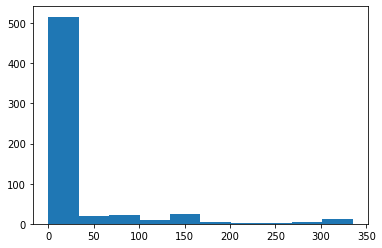

In [47]:
plt.hist(apps_clean["Time to first touchpoint - days"]);

#### Add Column: Time from First touchpoint to Close date

In [48]:
apps_clean[apps_clean['First touchpoint Date']>apps_clean['Close Date']]

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Drop,Drop Reason,how did you hear about us?,Person Account: Gender,Stage Duration,Account: Last Modified Date,First touchpoint Date,Hours Before First Touchpoint,Paid Deposit,Time to first touchpoint - days
1,DA,FT,2020,2020-03-23,PAR,2020-01-23,2020-03-31,Closed lost,0.0,0.0,...,0,Not specified,Social Media,Female,295.0,2020-08-10,2020-12-02,472.28,0,314
2,DA,FT,2020,2020-03-23,PAR,2020-01-27,2020-02-25,Paid Deposit,0.0,0.0,...,0,Not specified,google,Male,287.0,2020-04-12,2020-12-03,1084.12,1,311
3,DA,FT,2020,2020-03-23,PAR,2020-01-29,2020-03-31,Closed lost,0.0,0.0,...,0,Not specified,google,Male,278.0,2020-10-23,2020-07-02,210.37,0,155
4,UX,FT,2020,2020-03-23,PAR,2020-02-02,2020-03-31,Closed lost,0.0,0.0,...,0,Not specified,Social Media,Male,280.0,2020-09-09,2020-12-02,248.90,0,304
11,WD,FT,2020,2020-03-23,PAR,2020-01-27,2020-03-31,Closed lost,0.0,0.0,...,0,Not specified,IronhackEvent,Male,305.0,2020-08-10,2020-07-02,271.10,0,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,UX,FT,2020,2020-09-11,PAR,2020-06-09,2020-09-17,Paid Deposit,0.0,0.0,...,0,Not specified,Referral,Female,84.0,2020-05-12,2020-11-09,115.24,1,153
467,UX,FT,2020,2020-09-11,PAR,2020-09-10,2020-10-15,Paid Deposit,300.0,0.0,...,0,Not specified,Referral,Female,57.0,2020-05-12,2020-12-10,71.73,1,91
511,UX,FT,2021,2021-11-01,BCN,2020-07-11,2020-11-22,Paid Deposit,500.0,0.0,...,0,Not specified,Referral,Female,15.0,2020-04-12,2020-11-23,381.51,1,135
613,UX,FT,2020,2020-08-24,PAR,2020-06-05,2020-06-30,Closed lost,0.0,0.0,...,0,Not specified,google,Female,208.0,2020-11-13,2020-07-05,15.70,0,30


In [49]:
apps_clean.drop(apps_clean[apps_clean['First touchpoint Date']>apps_clean['Close Date']].index, inplace=True)  

In [50]:
apps_clean["Time First touchpoint to Close date - days"]=(apps_clean['Close Date'
                                                                          ] - apps_clean['First touchpoint Date']).dt.days


In [51]:
apps_clean["Time First touchpoint to Close date - days"]

0       75
5       46
6       46
7      114
9        0
      ... 
664     75
665     37
666     71
667     71
668     72
Name: Time First touchpoint to Close date - days, Length: 549, dtype: int64

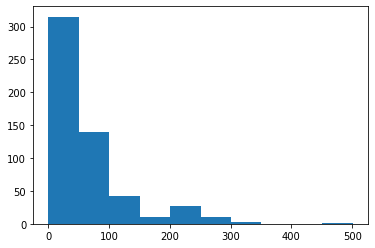

In [52]:
plt.hist(apps_clean["Time First touchpoint to Close date - days"]);

#### Add Column: Scholarship & Discount

In [53]:
apps_clean["Scholarship"]= [0 if value == 0.00 else 1 for value in apps_clean["Scholarship Amount (converted)"]]
apps_clean["Discount"]= [0 if value == 0.00 else 1 for value in apps_clean["Discount Amount (converted)"]]

#### Add Column: Time Conversion (days)
Time taken to convert the lead from it's creation to it's closure

In [54]:
apps_clean["Time Conversion - days"]= (apps_clean['Close Date'] - apps_clean['Created Date']).dt.days

#### Add Column: Time between Created Date and Start Date (days)

In [55]:
apps_clean["Time between Created Date and Start Date - days"]= (apps_clean['Bootcamp Start Date'
                                                                          ] - apps_clean['Created Date']).dt.days

#### Add Column: % Discount

Later we'll remove the amount use to creat this column

In [56]:
apps_clean["Discount(%)"]= 1- (round(apps_clean["Net Amount With VAT (converted)"]  / apps_clean["Amount (converted)"],2) )


#### Add Column: Creater Month 
Aggregate Creater Date by month

In [57]:
apps_clean["Creater Month"]=apps_clean['Created Date'].dt.month

#### Add Column: Creater Quarter 
Aggregate Creater Date by quarter

In [58]:
apps_clean["Creater Quarter"]=apps_clean['Created Date'].dt.quarter

#### Drop columns used to create the new ones and that now have no more use

In [59]:
apps_clean.columns

Index(['Bootcamp Course', 'Bootcamp Format', 'Bootcamp Year',
       'Bootcamp Start Date', 'Campus - Timezone', 'Created Date',
       'Close Date', 'Stage', 'Discount Amount (converted)',
       'Scholarship Amount (converted)', 'Amount (converted)',
       'Net Amount With VAT (converted)', 'Drop', 'Drop Reason',
       'how did you hear about us?', 'Person Account: Gender',
       'Stage Duration', 'Account: Last Modified Date',
       'First touchpoint Date', 'Hours Before First Touchpoint',
       'Paid Deposit', 'Time to first touchpoint - days',
       'Time First touchpoint to Close date - days', 'Scholarship', 'Discount',
       'Time Conversion - days',
       'Time between Created Date and Start Date - days', 'Discount(%)',
       'Creater Month', 'Creater Quarter'],
      dtype='object')

In [60]:
apps_clean.drop(columns=['Bootcamp Start Date','Created Date','Close Date', 'Stage',
                         'Discount Amount (converted)','Scholarship Amount (converted)', 
                         'Amount (converted)','Net Amount With VAT (converted)',
                         'Account: Last Modified Date','First touchpoint Date',
                        'Campus - Timezone','Bootcamp Year','Drop','Drop Reason'], inplace=True)

In [61]:
apps_clean.head()

,Bootcamp Course,Bootcamp Format,how did you hear about us?,Person Account: Gender,Stage Duration,Hours Before First Touchpoint,Paid Deposit,Time to first touchpoint - days,Time First touchpoint to Close date - days,Scholarship,Discount,Time Conversion - days,Time between Created Date and Start Date - days,Discount(%),Creater Month,Creater Quarter
0,DA,FT,Social Media,Male,144.0,12.78,0,0,75,0,0,75,56,0.0,7,3
5,UX,FT,IronhackEvent,Male,252.0,0.19,0,0,46,0,0,46,122,0.0,2,1
6,DA,FT,google,Female,291.0,0.34,0,0,46,0,0,46,174,0.0,2,1
7,DA,FT,other,Male,130.0,0.97,1,0,114,0,0,114,118,0.0,4,2
9,DA,FT,Social Media,Male,235.0,52.33,0,2,0,0,0,2,130,0.0,3,1


In [62]:
apps_clean.shape

(549, 16)

## CleanCSV 
Save CSV ready to model

In [63]:
apps_clean.to_csv("apps_PAR20201_clean_Sel_addCols.csv", index=False)